In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

* **Load File**

In [14]:
in_df = pd.read_csv('/Users/michelo/Documents/_DSI008_EOY/Clustering_Exo/nk_sk_it_aoiebola_kmeans_c.csv')
# Change column names to lowercase for consistency
in_df.columns = [col.lower() for col in in_df.columns]

in_df.head(10)

,fid,shape,objectid,pays,province,nomzs,codezs,nomas,codeas,edite_par,edit_date,fiabilite,longitude,latitude,nomzsas,popsize
0,0,Polygon,1,RDC,ITURI,BOGA,545101,BIKIMA,54510101,,12/29/2018,BASSE,29.968290,1.080888,BOGA-BIKIMA,7188
1,1,Polygon,2,RDC,ITURI,BOGA,545101,BOGA,54510102,,12/29/2018,BASSE,29.956936,1.019913,BOGA-BOGA,2841
2,2,Polygon,3,RDC,ITURI,BOGA,545101,BURASI,54510103,,12/29/2018,BASSE,30.130899,1.025999,BOGA-BURASI,3626
3,3,Polygon,4,RDC,ITURI,BOGA,545101,BWAKADI,54510104,,12/29/2018,BASSE,29.778580,0.920095,BOGA-BWAKADI,5250
4,4,Polygon,5,RDC,ITURI,BOGA,545101,KYABOHE,54510105,,12/29/2018,BASSE,30.087993,0.949825,BOGA-KYABOHE,7674
5,5,Polygon,6,RDC,ITURI,BOGA,545101,MUNGWANGA,54510106,,12/29/2018,BASSE,29.990225,0.927802,BOGA-MUNGWANGA,1761
6,6,Polygon,7,RDC,ITURI,BOGA,545101,RUBINGO,54510107,,12/29/2018,BASSE,29.940290,1.048066,BOGA-RUBINGO,7290
7,7,Polygon,8,RDC,ITURI,BOGA,545101,TCHABI,54510108,,12/29/2018,BASSE,29.876149,0.990573,BOGA-TCHABI,2994
8,8,Polygon,9,RDC,ITURI,BOGA,545101,TONDOLI,54510109,,12/29/2018,BASSE,29.916102,0.889091,BOGA-TONDOLI,7932
9,9,Polygon,10,RDC,ITURI,BOGA,545101,ZUNGULUKA,54510110,,12/29/2018,BASSE,29.899677,1.106454,BOGA-ZUNGULUKA,8517


### On supprime les lignes avec les longitudes et latitudes nulles

In [15]:
in_df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

### On crée une dataframe avec les longitude, latitudes et les Identifiants

In [16]:
X = in_df.loc[:,['codeas','longitude','latitude']]

In [11]:
X.head()

,codeas,longitude,latitude
0,54510101,29.968290,1.080888
1,54510102,29.956936,1.019913
2,54510103,30.130899,1.025999
3,54510104,29.778580,0.920095
4,54510105,30.087993,0.949825


# Calcul des clusters sans tenir compte des poids

In [37]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = in_df[['latitude']]
X_axis = in_df[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

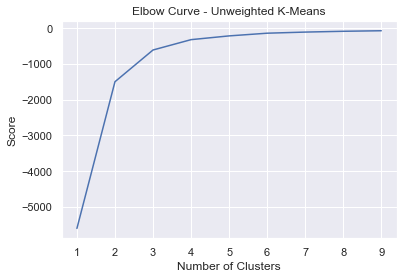

In [38]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve - Unweighted K-Means')
plt.show()

# Methode 2 : Creation ds clusters et visualisation

Text(0.5, 1.0, 'Clustering GPS Co-ordinates to Aire de Santé')

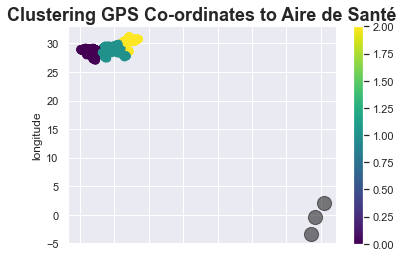

In [39]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

#Visualise Resutls
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering GPS Co-ordinates to Aire de Santé',fontsize=18, fontweight='bold')

### *******************************************************

# *Weighted clustering*

In [20]:
in_df.dropna(axis=0,how='any',subset=['codeas','latitude','longitude','popsize'],inplace=True)

In [21]:
# Variable with the Longitude and Latitude
X_weighted =in_df.loc[:,['codeas','latitude','longitude','popsize']]

In [22]:
X_weighted.head()

,codeas,latitude,longitude,popsize
0,54510101,1.080888,29.968290,7188
1,54510102,1.019913,29.956936,2841
2,54510103,1.025999,30.130899,3626
3,54510104,0.920095,29.778580,5250
4,54510105,0.949825,30.087993,7674


### Créer une courbe de coude pour sélectionner le nombre optimal de clusters - Clustering pondéré

In [23]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

lat_long = X_weighted[X_weighted.columns[1:3]]
lot_size = X_weighted[X_weighted.columns[3]]

sample_weight = lot_size

score = [kmeans[i].fit(lat_long, sample_weight = lot_size).score(lat_long) for i in range(len(kmeans))]

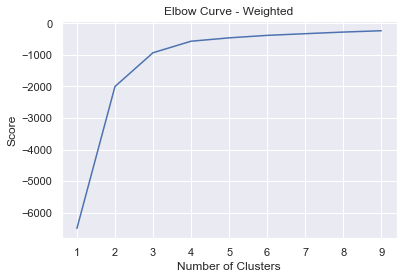

In [24]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve - Weighted')

plt.show()

Lorsque nous représentons le graphique, nous voyons que le graphique se stabilise lentement après 2 clusters. Cela implique que l'ajout de clusters supplémentaires ne nous aidera pas beaucoup. C'est déjà différent de ce que nous avions sans utiliser les poids.

Text(0.5, 1.0, 'Clustering GPS data to aire de santé with weight')

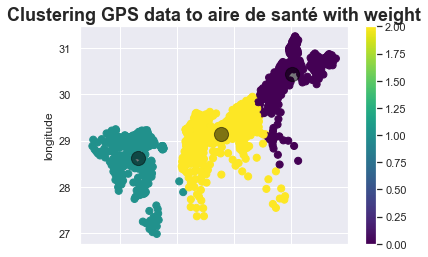

In [26]:
kmeans = KMeans(n_clusters = 3, max_iter=1000, init ='k-means++')

lat_long = X_weighted[X_weighted.columns[1:3]]
lot_size = X_weighted[X_weighted.columns[3]]
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
X_weighted['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = X_weighted['cluster_label'] # Labels of each point

X_weighted.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Cluster Optimal ponderée des aire de santé avec les poids',fontsize=18, fontweight='bold')

# Calculer et visualiser les résultats - Utilisation des clusters pondérés optimaux

Visualisons les résultats en traçant les données colorées par ces étiquettes. Nous allons également tracer les centres des clusters tels que déterminés par l'estimateur k-means :

Text(0.5, 1.0, 'OCluster Optimal ponderée des aire de santé avec les poids')

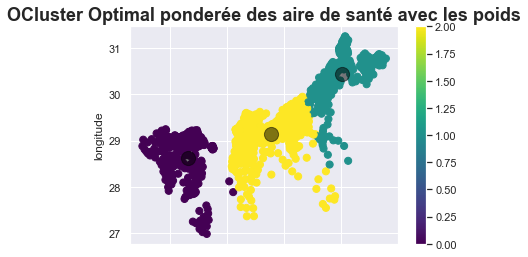

In [28]:
kmeans = KMeans(n_clusters = 3, max_iter=1000, init ='k-means++')

lat_long = X_weighted[X_weighted.columns[1:3]]
lot_size = X_weighted[X_weighted.columns[3]]
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
X_weighted['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = X_weighted['cluster_label'] # Labels of each point

X_weighted.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Cluster Optimal ponderée des aire de santé avec les poids',fontsize=18, fontweight='bold')

# Fusionner les résultats avec l'ensemble de vos données

Nous devons fusionner nos données existantes pour inclure les clusters afin de pouvoir effectuer une analyse plus approfondie. Nous avons deux variables contenant nos données, 'df' et 'X'. Voyons à quoi elles ressemblent avant.

In [29]:
in_df.head(3)

,fid,shape,objectid,pays,province,nomzs,codezs,nomas,codeas,edite_par,edit_date,fiabilite,longitude,latitude,nomzsas,popsize
0,0,Polygon,1,RDC,ITURI,BOGA,545101,BIKIMA,54510101,,12/29/2018,BASSE,29.968290,1.080888,BOGA-BIKIMA,7188
1,1,Polygon,2,RDC,ITURI,BOGA,545101,BOGA,54510102,,12/29/2018,BASSE,29.956936,1.019913,BOGA-BOGA,2841
2,2,Polygon,3,RDC,ITURI,BOGA,545101,BURASI,54510103,,12/29/2018,BASSE,30.130899,1.025999,BOGA-BURASI,3626


In [30]:
X_weighted.head(3)

,codeas,latitude,longitude,popsize,cluster_label
0,54510101,1.080888,29.968290,7188,1
1,54510102,1.019913,29.956936,2841,1
2,54510103,1.025999,30.130899,3626,1


Supprimons la longitude et la latitude de 'X' puisqu'elles existent déjà dans 'df'. Si nous ne supprimons pas les colonnes longitude et latitude, nous aurons deux autres colonnes créées pour la longitude et la latitude dans notre cadre de données. Ce n'est pas ce que nous voulons.

In [31]:
X_weighted = X_weighted[['codeas','cluster_label']]
X_weighted.head(3)

,codeas,cluster_label
0,54510101,1
1,54510102,1
2,54510103,1


### Nouveau dataframe des clusters

In [34]:
clustered_data = in_df.merge(X_weighted, left_on='codeas', right_on='codeas')
clustered_data.head(5)

,fid,shape,objectid,pays,province,nomzs,codezs,nomas,codeas,edite_par,edit_date,fiabilite,longitude,latitude,nomzsas,popsize,cluster_label
0,0,Polygon,1,RDC,ITURI,BOGA,545101,BIKIMA,54510101,,12/29/2018,BASSE,29.968290,1.080888,BOGA-BIKIMA,7188,1
1,1,Polygon,2,RDC,ITURI,BOGA,545101,BOGA,54510102,,12/29/2018,BASSE,29.956936,1.019913,BOGA-BOGA,2841,1
2,2,Polygon,3,RDC,ITURI,BOGA,545101,BURASI,54510103,,12/29/2018,BASSE,30.130899,1.025999,BOGA-BURASI,3626,1
3,3,Polygon,4,RDC,ITURI,BOGA,545101,BWAKADI,54510104,,12/29/2018,BASSE,29.778580,0.920095,BOGA-BWAKADI,5250,1
4,4,Polygon,5,RDC,ITURI,BOGA,545101,KYABOHE,54510105,,12/29/2018,BASSE,30.087993,0.949825,BOGA-KYABOHE,7674,1


# Exportation vers un nouveau fichier CSV avec les clusters

In [35]:
clustered_data.to_csv ('/Users/michelo/Documents/_DSI008_EOY/Clustering_Exo/nk_sk_clustered_final.csv', index=None, header = True)

# Definition des centroides sur base des données

In [36]:
centers = kmeans.cluster_centers_
print(centers)

[[-3.36204028 28.61505916]
 [ 2.04059086 30.43281952]
 [-0.45149802 29.13366601]]
